In [1]:
#Load the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the data
#titanic_data=pd.read_csv(train.csv)
titanic_data=pd.read_csv("train.csv")

# some info about the data
emparked shows which city one boarded the ship from   
sibsp represents the number of siblings    
parch represents children/parents

In [3]:
#check the first 5 rows of data
#titanic_data.head()
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.describe()
#titanic_data.describe()   

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


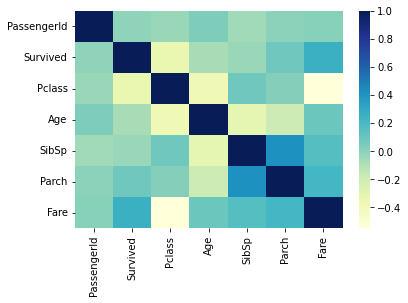

In [5]:
#plotting a corelation matrix to see how eac feature relates to the other features
sns.heatmap(titanic_data.corr(), cmap="YlGnBu")
plt.show()

In [6]:
#To split the data into training and test data using shuffling method
from sklearn.model_selection import StratifiedShuffleSplit

In [7]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_indices,test_indices in split.split(titanic_data,titanic_data[["Survived","Pclass","Sex"]]):
    strat_train_set=titanic_data.loc[train_indices]
    strat_test_set=titanic_data.loc[test_indices]

In [8]:
strat_train_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
619,620,0,2,"Gavey, Mr. Lawrence",male,26.0,0,0,31028,10.5000,NaN,S
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
286,287,1,3,"de Mulder, Mr. Theodore",male,30.0,0,0,345774,9.5000,NaN,S
834,835,0,3,"Allum, Mr. Owen George",male,18.0,0,0,2223,8.3000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
482,483,0,3,"Rouse, Mr. Richard Henry",male,50.0,0,0,A/5 3594,8.0500,NaN,S
518,519,1,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.0,1,0,226875,26.0000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
603,604,0,3,"Torber, Mr. Ernst William",male,44.0,0,0,364511,8.0500,NaN,S


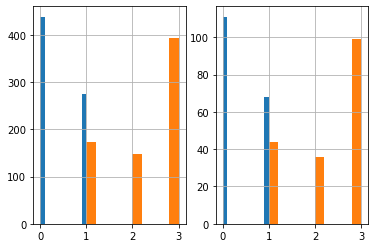

In [9]:
# checking if the data has been equally distributed
plt.subplot(1,2,1)
strat_train_set["Survived"].hist()
strat_train_set["Pclass"].hist()

plt.subplot(1,2,2)
strat_test_set["Survived"].hist()
strat_test_set["Pclass"].hist()

plt.show()


the histograms above are showing how the data has been split. The shuffle method has done a preaty good job in uniformly distributing the data

In [10]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 867 to 802
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          565 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        167 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


well from our data information the training set has missing data; the age and cabin column. Its time to figure out how to clean that mess. Removing the null lets say in age column will lead to reduction in the number of rows; over 100 entries of data will have to be removed, thats not the best option.    

we will use estimators in this project

In [11]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.impute import SimpleImputer

In [12]:
class AgeImputer(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    
    def transform(self, X):
        imputer=SimpleImputer(strategy="mean")
        X["Age"]=imputer.fit_transform(X[["Age"]])
        return X

In [13]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        encoder=OneHotEncoder()
        matrix=encoder.fit_transform(X[["Embarked"]]).toarray()
        
        column_names=["Q","S","C","N"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]]=matrix.T[i]
            
        matrix=encoder.fit_transform(X[["Sex"]]).toarray()
        
        column_names=["Female","Male"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]]=matrix.T[i]
            
        return X
    
    

In [18]:
class FeatureDropper(BaseEstimator,TransformerMixin):
    
    def fit(self, X,y=None):
        return self
    
    def transform(self,X):
        return X.drop(["Embarked","Name","Ticket","Cabin","Sex","N"],axis=1,errors="ignore")

In [19]:
from sklearn.pipeline import Pipeline

In [20]:
pipeline=Pipeline([("ageimputer",AgeImputer()),("featureencoder",FeatureEncoder()),("featuredropper",FeatureDropper())])

In [21]:
strat_train_set=pipeline.fit_transform(strat_train_set)

In [22]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 867 to 802
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   Q            712 non-null    float64
 8   S            712 non-null    float64
 9   C            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler=StandardScaler()

In [25]:
X=strat_train_set.drop(["Survived"],axis=1)
y=strat_train_set["Survived"]
X_data=scaler.fit_transform(X)
y_data=y.to_numpy()

In [38]:
#Note: this cell will take longer time to run patience is required!
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf=RandomForestClassifier()

#setting the parameter lists of random forest for another algorithm use its parameters say svc() have gamma and c in param_gird
param_gird=[{"n_estimators":[10,100,200,500,600,1000,10000],"max_depth":[None,5,10,12,15,20,25,30],"min_samples_split":[2,3,4]}]

grid_search=GridSearchCV(clf,param_gird,cv=3,scoring="accuracy",return_train_score=True)
grid_search.fit(X_data,y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10, 12, 15, 20, 25, 30],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500, 600, 1000,
                                           10000]}],
             return_train_score=True, scoring='accuracy')

In [39]:
final_clf=grid_search.best_estimator_

In [40]:
#you can tune the parameters and train the model again
final_clf

RandomForestClassifier(max_depth=12, min_samples_split=4, n_estimators=200)

In [41]:
strat_test_set=pipeline.fit_transform(strat_test_set)
X_test=strat_test_set.drop(["Survived"],axis=1)
y_test=strat_test_set["Survived"]

X_data_test=scaler.fit_transform(X_test)
y_data_test=y_test.to_numpy()

In [42]:
final_clf.score(X_data_test,y_data_test)
#you can train a different model and compare the accuracy score then pick the best model for the nesxt step

0.8324022346368715

In [43]:
#training the final model using the whole training dataset(imported as titanic_data)
final_data=pipeline.fit_transform(titanic_data)
X_final=final_data.drop(["Survived"],axis=1)
y_final=final_data["Survived"]

X_final=scaler.fit_transform(X_final)
y_final=y_final.to_numpy()
#X_final.info()
#y_final.info()

# the cell below will also take longer time to run

In [44]:
grid_search.fit(X_final,y_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10, 12, 15, 20, 25, 30],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500, 600, 1000,
                                           10000]}],
             return_train_score=True, scoring='accuracy')

now load the test data and prepare the data to make sure it has no missing values, scaled the same

In [46]:
myfinal_clf=grid_search.best_estimator_
myfinal_clf

RandomForestClassifier(max_depth=10, min_samples_split=4, n_estimators=200)

In [58]:
#prepare test data that we are given with no knowledge of the target
titanic_test=pd.read_csv("test.csv")

#remember the pipeline will deal with missing values of age,encoding,and dropping some columns
titanic_test=pipeline.fit_transform(titanic_test)

#scaler the data using the same scaler as of training data
#titanic_x_test=scaler.fit_transform(titanic_test_data)
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   Q            418 non-null    float64
 7   S            418 non-null    float64
 8   C            418 non-null    float64
 9   Female       418 non-null    float64
 10  Male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.0 KB


In [59]:
#we still have null values in fare column remember our pipeline only had ageimputer
titanic_test=titanic_test.fillna(method="ffill")

In [60]:
#scale the test data
titanic_test_scaled=scaler.fit_transform(titanic_test)

In [61]:
#make the predictions
predictions=final_clf.predict(titanic_test_scaled)

In [67]:
#create a dataframe to for passenger_id and predictions as required by kaggle submission competition rules
final_df=pd.DataFrame(titanic_test_data["PassengerId"])
final_df["Survived"]=predictions
final_df.to_csv("predictions.csv",index=False)
#upload your csv for accuracy checking on kaggle

In [66]:
pred=pd.read_csv("prediction.csv")

In [68]:
pred.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
